In [325]:
# !mkdir wids_data_thon 
# !tar -xf WiDSWorldWide_GlobalDathon26.zip -C wids_data_thon

Overview

    When a wildfire ignites, emergency managers face an impossible question with incomplete information. Which fires will reach populated areas? How quickly? And which communities should prepare first?
    
    This year's WiDS Global Datathon challenges participants to build survival models that answer these questions using only the earliest signals available. Your task is to predict the probability that a wildfire will threaten an evacuation zone within 12, 24, 48, and 72 hours, drawing on data from just the first five hours after ignition.
    
    The goal is not a single prediction but a calibrated forecast across multiple time horizons. Emergency responders need both urgency rankings (which fires demand immediate attention) and probability estimates they can trust when making high-stakes decisions about evacuations, resource deployment, and public alerts.

I. Non-Parametric Models (Descriptive)

These models are primarily used for visualizing and describing the data without assuming a specific underlying distribution.


Algorithm,What it Does,Key Specifications/Assumptions:

        Kaplan-Meier (KM) Estimator,"Estimates the survival function S(t) from lifetime data. It is the ""gold standard"" for visualizing survival curves.",Non-parametric. Does not require a specific distribution. Assumes censoring is independent of survival.
        Nelson-Aalen Estimator,Estimates the cumulative hazard function H(t). Useful for understanding the risk over time.,Non-parametric. Robust for small samples. Good for identifying the rate of event occurrences.
        Log-Rank Test,A statistical test used to compare the survival distributions of two or more independent groups.,Non-parametric. Tests the null      hypothesis that there is no difference between the populations.


II. Semi-Parametric Models (Regression)

These models allow you to assess the effect of multiple variables (covariates) on survival time.


Algorithm,What it Does,Key Specifications/Assumptions

    Cox Proportional Hazards (CPH),Models the relationship between covariates and the hazard rate. It is the most widely used regression model.,"Proportional Hazards Assumption: Assumes the ratio of hazards for any two individuals is constant over time. It is semi-parametric because the ""baseline hazard"" is unspecified."
    Regularized Cox (Lasso/Ridge),An extension of CPH that adds penalties (L1/L2) to the likelihood function to handle high-dimensional data.,Used when you have many features (more than observations). Prevents overfitting and performs feature selection.



III. Parametric Models

These models assume the survival times follow a specific mathematical distribution.


Algorithm,What it Does,Key Specifications/Assumptions

    Weibull Model,"A versatile model where the hazard rate can increase, decrease, or remain constant over time.",Parametric. Requires the data to fit a Weibull distribution. Very common in engineering and reliability.
    Exponential Model,A simpler version of Weibull where the hazard rate is strictly constant.,"Parametric. Assumes ""memoryless"" property—the risk of the event doesn't change regardless of how long the subject has survived."
    Accelerated Failure Time (AFT),"Instead of modeling the hazard, it models the log of the survival time as a linear function of covariates.",Parametric. Assumes that the effect of a covariate is to accelerate or decelerate the life course of a subject.

IV. Machine Learning & Deep Learning Models

Modern approaches designed to capture non-linear relationships and complex interactions.


Algorithm,What it Does,Key Specifications/Assumptions

    Random Survival Forest (RSF),An ensemble of survival trees. It averages the results of many trees to predict survival.,Non-linear. Does not require the Proportional Hazards assumption. Excellent for handling high-dimensional data and complex interactions.
    DeepSurv,A deep learning approach that uses a Neural Network to predict the hazard ratio in a CPH-like framework.,Deep Learning. Effectively models non-linear effects of covariates. Requires larger datasets compared to traditional CPH.
    MTLR (Multi-Task Logistic Regression),Models the survival probability across multiple discrete time intervals simultaneously.,Multi-task. Estimates the entire survival distribution rather than just a single risk score. Good for personalized survival curves.



Which model should you choose?

    For simple visualization: Use Kaplan-Meier.

    For standard medical/clinical research: Use Cox Proportional Hazards.

    For complex, high-dimensional data (e.g., genomics or tech logs): Use Random Survival Forest or DeepSurv.

    For physical engineering/failure analysis: Use Weibull.

Would you like me to provide a Python code template using the lifelines or pysurvival library to implement one of these?

In [326]:
# from sksurv.tree import SurvivalTree

Columns
Identifier

    event_id: Anonymized fire event identifier (stable random remap, no temporal meaning)

Targets (train only)

    time_to_hit_hours: Time from t0+5h until fire comes within 5 km of an evac zone (hours). For censored events (never hit within 72h), this is the last observed time within the window (<= 72).
    event: Event indicator, 1 if fire hit within 72h, 0 if censored (never hit)

Temporal Coverage (first 5h only)

    num_perimeters_0_5h: Number of perimeters within first 5 hours
    dt_first_last_0_5h: Time span between first and last perimeter (hours)
    low_temporal_resolution_0_5h: Flag, 1 if dt < 0.5h or only 1 perimeter, else 0

Growth Features

    area_first_ha: Initial fire area at t0 (hectares)
    area_growth_abs_0_5h: Absolute area growth (hectares)
    area_growth_rel_0_5h: Relative area growth (fraction)
    area_growth_rate_ha_per_h: Area growth rate (hectares/hour)
    log1p_area_first: Log(1 + initial area)
    log1p_growth: Log(1 + absolute growth)
    log_area_ratio_0_5h: Log ratio of final to initial area
    relative_growth_0_5h: Relative growth (same as area_growth_rel_0_5h)
    radial_growth_m: Change in effective radius (meters)
    radial_growth_rate_m_per_h: Rate of radial growth (meters/hour)

Centroid Kinematics

    centroid_displacement_m: Total displacement of fire centroid (meters)
    centroid_speed_m_per_h: Speed of centroid movement (meters/hour)
    spread_bearing_deg: Bearing/direction of fire spread (degrees)
    spread_bearing_sin: Sine of spread bearing (circular encoding)
    spread_bearing_cos: Cosine of spread bearing (circular encoding)

Distance to Evacuation Zone Centroids

    dist_min_ci_0_5h: Minimum distance to nearest evac zone centroid (meters)
    dist_std_ci_0_5h: Standard deviation of distances
    dist_change_ci_0_5h: Change in distance (d5 - d0, negative = closing)
    dist_slope_ci_0_5h: Linear slope of distance vs time (meters/hour)
    closing_speed_m_per_h: Speed at which fire is closing distance (m/hour, positive = closing)
    closing_speed_abs_m_per_h: Absolute closing speed
    projected_advance_m: Projected advance toward evac zone (d0 - d5)
    dist_accel_m_per_h2: Acceleration in distance change (meters/hour^2)
    dist_fit_r2_0_5h: R^2 of linear fit to distance vs time

Directionality

    alignment_cos: Cosine of angle between fire motion and evac direction
    alignment_abs: Absolute alignment between fire motion and evac direction (0-1, higher = more aligned)
    cross_track_component: Sideways drift component
    along_track_speed: Speed component toward/away from evac

Temporal Metadata

    event_start_hour: Hour of day when fire started (0-23)
    event_start_dayofweek: Day of week (0 = Monday, 6 = Sunday)
    event_start_month: Month when fire started (1-12)

Acronyms and Short Terms

    t0: Fire start time (first perimeter observation)
    5h: Feature window length (first 5 hours after t0)
    evac: Evacuation zone
    ci: Centroid-to-centroid distance

Full column definitions are in metaData.csv.

In [327]:
# importing libraries
import math
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

from lifelines.datasets import load_dd
from lifelines import KaplanMeierFitter


train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
sub=pd.read_csv("sample_submission.csv")
train.head()

,event_id,num_perimeters_0_5h,dt_first_last_0_5h,low_temporal_resolution_0_5h,area_first_ha,area_growth_abs_0_5h,area_growth_rel_0_5h,area_growth_rate_ha_per_h,log1p_area_first,log1p_growth,...,dist_fit_r2_0_5h,alignment_cos,alignment_abs,cross_track_component,along_track_speed,event_start_hour,event_start_dayofweek,event_start_month,time_to_hit_hours,event
0,10892457,3,4.265188,0,79.696304,2.875935,0.036086,0.674281,4.390693,1.354787,...,0.886373,-0.054649,0.054649,-1.937219,-0.106026,19,4,5,18.892512,0
1,11757157,2,1.169918,0,8.946749,0.000000,0.000000,0.000000,2.297246,0.000000,...,0.000000,-0.568898,0.568898,-0.000000,-0.000000,4,4,6,22.048108,1
2,11945086,4,4.777526,0,106.482638,0.000000,0.000000,0.000000,4.677329,0.000000,...,0.000000,0.882385,0.882385,0.000000,0.000000,22,4,8,0.888895,1
3,12044083,1,0.000000,1,67.631125,0.000000,0.000000,0.000000,4.228746,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,20,5,8,60.953021,0
4,12052347,2,4.975273,0,35.632874,0.000000,0.000000,0.000000,3.600946,0.000000,...,0.000000,0.934634,0.934634,-0.000000,0.000000,21,5,7,44.990274,0


In [328]:
train.event.value_counts()

event
0    152
1     69
Name: count, dtype: int64

In [329]:
from sksurv.util import Surv

# From two separate arrays or lists
# y_train = Surv.from_arrays(event=train['event'], time=train['time_to_hit_hours'])

# OR directly from a DataFrame
# y_train = Surv.from_dataframe(event='event', time='time_to_hit_hours', data=train)

# Do the same for your test data
# y_test = Surv.from_arrays(event=test['event'], time=test['time_to_hit_hours'])

X = train.iloc[:,1:-2] 
X_test = test.iloc[:,1:] 

In [330]:
from sksurv.ensemble import RandomSurvivalForest

# rsf = RandomSurvivalForest(n_estimators=100)
# rsf.fit(X_train, y_train)

# Get the survival curves
# surv_funcs = rsf.predict_survival_function(X_test)

# Calculate the area under the curve (Mean Survival Time)
# import numpy as np
# predicted_hours = [np.trapz(s.y, s.x) for s in surv_funcs]

# X_test['predicted_hours'] = predicted_hours

# import numpy as np

# # Define the competition time points
# time_points = [12, 24, 48, 72]

# # Create a helper function to safely extract the probability
# Single safe probability for one survival function
def get_safe_prob(s_func, t, eps=1e-6):
    """
    Return event probability 1 - S(t) safely,
    clipping t to the survival function's domain.
    """
    max_t = s_func.domain[1]
    safe_t = min(max(t, eps), max_t)
    return 1.0 - s_func(safe_t)



def extract_event_probs(surv_funcs, time_points, eps=1e-6):
    """
    Convert survival functions to event probabilities at given time points.
    Works for:
    - sksurv StepFunction
    - blended/custom survival functions
    """

    probs = np.zeros((len(surv_funcs), len(time_points)))

    for i, fn in enumerate(surv_funcs):

        # ---- handle sksurv StepFunction vs custom fn ----
        try:
            max_t = fn.domain[1]   # sksurv StepFunction
        except:
            max_t = max(time_points)  # blended/custom safe fallback

        for j, t in enumerate(time_points):

            # keep inside domain
            safe_t = min(max(t, eps), max_t)

            probs[i, j] = 1.0 - fn(safe_t)

    return probs





In [331]:
from sksurv.metrics import concordance_index_censored, brier_score
import numpy as np


# def calculate_hybrid_score(
#     model,
#     X_val,
#     y_val,
#     horizons=[24, 48, 72],
#     weights=[0.3, 0.4, 0.3],
#     eps=1e-6
# ):

#     # =====================
#     # 1. C-index
#     # =====================

#     risk_preds = model.predict(X_val)

#     c_index = concordance_index_censored(
#         y_val["event"],
#         y_val["time"],
#         risk_preds
#     )[0]

#     # =====================
#     # 2. SAFE horizons (sksurv strict)
#     # =====================

#     min_time = y_val["time"].min()
#     max_time = y_val["time"].max()

#     safe_horizons = np.clip(
#         horizons,
#         min_time + eps,
#         max_time - eps
#     )

#     # =====================
#     # 3. Event probabilities
#     # =====================

#     surv_fns = model.predict_survival_function(X_val)

#     event_probs = extract_event_probs(
#         surv_fns,
#         safe_horizons,
#         eps=eps
#     )   # shape: (n_samples, len(horizons))

#     event_probs_all = extract_event_probs(
#         surv_fns,
#         [12, 24, 48, 72],
#         eps=eps
#     )

#     # =====================
#     # 4. Censor-aware Brier
#     # =====================

#     brier_vals = []

#     for i, t in enumerate(safe_horizons):

#         # sksurv expects SURVIVAL prob
#         surv_probs = 1.0 - event_probs[:, i]

#         _, bs = brier_score(
#             y_val,
#             y_val,
#             surv_probs,
#             t
#         )

#         brier_vals.append(bs[0])

#     brier_vals = np.array(brier_vals)

#     weighted_brier = np.average(
#         brier_vals,
#         weights=weights[:len(brier_vals)]
#     )

#     # =====================
#     # 5. Hybrid
#     # =====================

#     hybrid = 0.3 * c_index + 0.7 * (1.0 - weighted_brier)

#     # =====================
#     # 6. Return (clean)
#     # =====================

#     return {
#         "hybrid": hybrid,
#         "c_index": c_index,
#         "weighted_brier": weighted_brier,
#         "brier_each": dict(zip(horizons[:len(brier_vals)], brier_vals)),

#         # event probabilities aligned with horizons
#         "prob_12h": event_probs_all[:, 0],
#         "prob_24h": event_probs_all[:, 1],
#         "prob_48h": event_probs_all[:, 2],
#         "prob_72h": event_probs_all[:, 3],
#         "risk_score":risk_preds
#     }


In [332]:
def get_risk_predictions(model, X, blend_weights=None):
    """
    model can be:
      - single model
      - list of models (blending)
      - dict with meta learner (stacking)

    blend_weights:
      - None  -> simple mean blending
      - list/array -> weighted blending
    """

    # =========================
    # 1. Blending
    # =========================
    if isinstance(model, list):

        risks = np.column_stack([
            m.predict(X) for m in model
        ])

        # ---- weighted blending ----
        if blend_weights is not None:

            blend_weights = np.array(blend_weights)
            blend_weights = blend_weights / blend_weights.sum()   # normalize

            risk_preds = np.dot(risks, blend_weights)

        # ---- simple mean ----
        else:
            risk_preds = risks.mean(axis=1)

    # =========================
    # 2. Stacking (meta learner)
    # =========================
    elif isinstance(model, dict):

        base_models = model["base_models"]
        meta_model  = model["meta_model"]
        scaler      = model["scaler"]

        meta_feats = np.column_stack([
            m.predict(X) for m in base_models
        ])

        meta_feats = scaler.transform(meta_feats)

        risk_preds = meta_model.predict(meta_feats)

    # =========================
    # 3. Single model
    # =========================
    else:

        risk_preds = model.predict(X)

    return risk_preds

In [333]:
def approx_survival_from_risk(risk_scores, horizons=None):
    """
    Convert risk scores into pseudo survival functions.
    Higher risk -> faster decay.

    Returns list of callable survival functions.
    """

    # normalize risks for numerical stability
    risk_scores = np.asarray(risk_scores)
    risk_scores = (risk_scores - risk_scores.min()) / (risk_scores.max() - risk_scores.min() + 1e-8)

    surv_fns = []

    for r in risk_scores:

        # exponential decay (Cox-like)
        def fn(t, r=r):
            return np.exp(-r * t)

        # attach domain for compatibility
        fn.domain = (0.0, np.inf)

        surv_fns.append(fn)

    return surv_fns

In [334]:
def get_survival_functions(model, X, risk_preds=None, blend_weights=None):

    # -----------------------
    # BLENDING
    # -----------------------
    if isinstance(model, list):

        surv_all = [m.predict_survival_function(X) for m in model]

        if blend_weights is None:
            blend_weights = np.ones(len(model)) / len(model)

        surv_fns = []

        for i in range(len(X)):

            sf_i = [sf[i] for sf in surv_all]

            # 👉 find common safe domain
            max_t = min(f.domain[1] for f in sf_i)

            def fn(t, sf_i=sf_i, w=blend_weights, max_t=max_t):

                safe_t = min(t, max_t)   # <<< KEY FIX

                return np.sum([
                    w[j] * sf_i[j](safe_t)
                    for j in range(len(sf_i))
                ])

            # attach domain manually (optional but clean)
            fn.domain = (0.0, max_t)

            surv_fns.append(fn)

        return surv_fns

    # -----------------------
    # SINGLE MODEL
    # -----------------------
    elif hasattr(model, "predict_survival_function"):

        return model.predict_survival_function(X)

    # -----------------------
    # META / RISK ONLY
    # -----------------------
    else:
        return approx_survival_from_risk(risk_preds)

In [335]:
def calculate_hybrid_score(
    model,
    X_val,
    y_val,
    horizons=[24, 48, 72],
    weights=[0.3, 0.4, 0.3],
    eps=1e-6,
    blend_weights=None   # 👈 NEW
):

    # =====================
    # 1. Universal risk preds
    # =====================

    risk_preds = get_risk_predictions(
        model,
        X_val,
        blend_weights=blend_weights
    )

    # =====================
    # 2. C-index
    # =====================

    c_index = concordance_index_censored(
        y_val["event"],
        y_val["time"],
        risk_preds
    )[0]

    # =====================
    # 3. Safe horizons
    # =====================

    min_time = y_val["time"].min()
    max_time = y_val["time"].max()

    safe_horizons = np.clip(
        horizons,
        min_time + eps,
        max_time - eps
    )

    # =====================
    # 4. Universal survival functions
    # =====================

    surv_fns = get_survival_functions(
        model,
        X_val,
        risk_preds=risk_preds,
        blend_weights=blend_weights
    )

    # =====================
    # 5. Event probabilities
    # =====================

    event_probs = extract_event_probs(
        surv_fns,
        safe_horizons,
        eps
    )

    event_probs_all = extract_event_probs(
        surv_fns,
        [12, 24, 48, 72],
        eps
    )

    # =====================
    # 6. Brier score
    # =====================

    brier_vals = []

    for i, t in enumerate(safe_horizons):

        surv_probs = 1.0 - event_probs[:, i]

        _, bs = brier_score(
            y_val,
            y_val,
            surv_probs,
            t
        )

        brier_vals.append(bs[0])

    brier_vals = np.array(brier_vals)

    weighted_brier = np.average(
        brier_vals,
        weights=weights[:len(brier_vals)]
    )

    # =====================
    # 7. Hybrid score
    # =====================

    hybrid = 0.3 * c_index + 0.7 * (1.0 - weighted_brier)

    # =====================
    # 8. Return
    # =====================

    return {
        "hybrid": hybrid,
        "c_index": c_index,
        "weighted_brier": weighted_brier,
        "brier_each": dict(zip(horizons[:len(brier_vals)], brier_vals)),

        "prob_12h": event_probs_all[:, 0],
        "prob_24h": event_probs_all[:, 1],
        "prob_48h": event_probs_all[:, 2],
        "prob_72h": event_probs_all[:, 3],

        "risk_score": risk_preds
    }



# calculate_hybrid_score(rsf, X_val, y_val)

# calculate_hybrid_score([rsf, gbsa, extra], X_val, y_val)

# calculate_hybrid_score(stack_model_dict, X_val, y_val)


In [336]:
# import pandas as pd

# =====================================
# Helper: attach predictions to dataframe
# =====================================
def attach_survival_predictions(base_df, 
                                oof_prob_12h,
                                oof_prob_24h,
                                oof_prob_48h,
                                oof_prob_72h,
                                risk_scores):

    df_preds = pd.DataFrame({
        "prob_12h": oof_prob_12h,
        "prob_24h": oof_prob_24h,
        "prob_48h": oof_prob_48h,
        "prob_72h": oof_prob_72h,
        "risk_score": risk_scores
    }, index=base_df.index)

    return pd.concat([base_df, df_preds], axis=1)

In [337]:
# feature engineering ,......

# ✅ 1. Growth intensity features

def growth_intensity(df):
    # ===============================
    # Growth intensity
    # ===============================
    df["growth_pressure"] = df["area_growth_rate_ha_per_h"] * df["radial_growth_rate_m_per_h"]
    df["log_growth_rate"] = np.log1p(df["area_growth_rate_ha_per_h"])
    df["growth_accel_proxy"] = df["area_growth_abs_0_5h"] / (df["dt_first_last_0_5h"] + 1e-6)
    df["growth_to_initial_ratio"] = df["area_growth_abs_0_5h"] / (df["area_first_ha"] + 1e-6)
    df["radial_to_area_ratio"] = df["radial_growth_m"] / (df["area_growth_abs_0_5h"] + 1e-6)

    # ===============================
    # Distance × growth interactions
    # # ===============================
    df["closing_growth_product"] = df["closing_speed_m_per_h"] * df["area_growth_rate_ha_per_h"]
    df["projected_threat_index"] = df["projected_advance_m"] / (df["dist_min_ci_0_5h"] + 1e-6)
    df["growth_vs_distance"] = df["area_growth_abs_0_5h"] / (df["dist_min_ci_0_5h"] + 1e-6)
    df["radial_vs_distance"] = df["radial_growth_m"] / (df["dist_min_ci_0_5h"] + 1e-6)
    df["closing_pressure"] = df["closing_speed_abs_m_per_h"] / (df["dist_min_ci_0_5h"] + 1e-6)

    # ===============================
    # Directionality / alignment
    # ===============================
    df["directional_closing_speed"] = df["closing_speed_m_per_h"] * df["alignment_cos"]
    df["aligned_growth_rate"] = df["area_growth_rate_ha_per_h"] * df["alignment_abs"]
    df["along_track_growth"] = df["along_track_speed"] * df["radial_growth_rate_m_per_h"]
    df["cross_track_penalty"] = np.abs(df["cross_track_component"]) / (df["along_track_speed"].abs() + 1e-6)

    # ===============================
    # Early instability / volatility
    # ===============================
    df["temporal_density"] = df["num_perimeters_0_5h"] / (df["dt_first_last_0_5h"] + 1e-6)
    df["distance_volatility"] = df["dist_std_ci_0_5h"] / (df["dist_min_ci_0_5h"] + 1e-6)
    df["nonlinear_motion_flag"] = (df["dist_fit_r2_0_5h"] < 0.8).astype(int)
    df["rapid_change_flag"] = (df["closing_speed_abs_m_per_h"] > df["closing_speed_abs_m_per_h"].quantile(0.9)).astype(int)

    # ===============================
    # Temporal cyclic encoding
    # ===============================
    df["start_hour_sin"] = np.sin(2*np.pi*df["event_start_hour"]/24)
    df["start_hour_cos"] = np.cos(2*np.pi*df["event_start_hour"]/24)
    df["start_month_sin"] = np.sin(2*np.pi*df["event_start_month"]/12)
    df["start_month_cos"] = np.cos(2*np.pi*df["event_start_month"]/12)
    df["start_dow_sin"] = np.sin(2*np.pi*df["event_start_dayofweek"]/7)
    df["start_dow_cos"] = np.cos(2*np.pi*df["event_start_dayofweek"]/7)

    # ===============================
    # Composite hazard scores
    # ===============================
    df["early_threat_score"] = df["growth_vs_distance"] * df["alignment_abs"] * (1 + df["closing_pressure"])
    df["kinematic_threat_score"] = df["centroid_speed_m_per_h"] * df["aligned_growth_rate"] / (df["dist_min_ci_0_5h"] + 1e-6)
    df["overall_danger_index"] = df["early_threat_score"] + df["kinematic_threat_score"] + df["projected_threat_index"]

    # ===============================
    # Survival-specific transforms
    # ===============================
    df["log_dist_min"] = np.log1p(df["dist_min_ci_0_5h"])
    df["log_closing_speed"] = np.log1p(df["closing_speed_abs_m_per_h"])
    df["hazard_like_feature"] = df["area_growth_rate_ha_per_h"] / (df["dist_min_ci_0_5h"] + 1)

    return df



def engineer_features(df):
    """
    Create physics-based features for wildfire prediction.

    Args:
        df: DataFrame with raw features

    Returns:
        DataFrame with original + new features
    """
    out = df.copy()

    # Get key raw features
    distance = out['dist_min_ci_0_5h'].clip(lower=1)  # Avoid division by zero
    speed = out['closing_speed_m_per_h']

    # Feature 1: Estimated time to contact
    # Simple physics: time = distance / speed
    # This tells us "at current speed, when will the fire reach the zone?"
    out['time_to_contact'] = distance / speed.clip(lower=0.01)
    out['log_time_to_contact'] = np.log1p(out['time_to_contact'].clip(0, 5000))

    # Feature 2: Danger vector
    # Combines alignment (is fire heading toward zone?) with speed
    # High value = fire is moving fast AND heading straight at the zone
    out['danger_vector'] = out['alignment_abs'] * speed

    # Feature 3: Tracking urgency
    # More perimeter observations + faster movement = more urgent situation
    out['tracking_urgency'] = out['num_perimeters_0_5h'] * speed

    # Feature 4: Fire intensity
    # Growth rate * observation count = how aggressively is this fire behaving?
    out['fire_intensity'] = out['area_growth_rate_ha_per_h'] * out['num_perimeters_0_5h']

    # Feature 5: Approach momentum
    # Combines speed, alignment, and proximity into one "danger score"
    out['approach_momentum'] = speed * out['alignment_abs'] / np.log1p(distance)

    # Feature 6: Log distance (tree models like log-transformed distances)
    out['log_dist'] = np.log1p(distance)

    # Feature 7-8: Distance zones (categorical approach)
    # Critical zone: Very close, high danger
    out['dist_zone_critical'] = (distance < 5000).astype(np.float32)
    # Mid zone: Moderate distance, needs monitoring
    out['dist_zone_mid'] = ((distance >= 5000) & (distance < 15000)).astype(np.float32)

    # Feature 9: Speed per unit distance (normalized approach rate)
    out['speed_per_km'] = speed / (distance / 1000).clip(lower=0.1)

    # Clean up any infinite or NaN values
    out = out.replace([np.inf, -np.inf], np.nan).fillna(0)

    return out

In [338]:
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

from sksurv.util import Surv
from sksurv.ensemble import RandomSurvivalForest

from sksurv.ensemble import GradientBoostingSurvivalAnalysis

from sksurv.ensemble import ExtraSurvivalTrees, ComponentwiseGradientBoostingSurvivalAnalysis


# ===============================
# Prepare target
# ===============================

time = train["time_to_hit_hours"].values
event = train["event"].astype(bool).values

y = Surv.from_arrays(event, time)

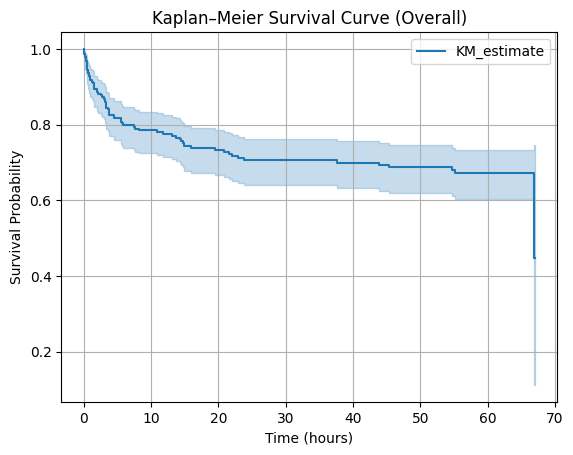

In [339]:
# 1. Plot the baseline survival curve (Kaplan–Meier)

from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()

kmf.fit(
    durations=y["time"], 
    event_observed=y["event"]
)

kmf.plot_survival_function()

plt.title("Kaplan–Meier Survival Curve (Overall)")
plt.xlabel("Time (hours)")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.show()

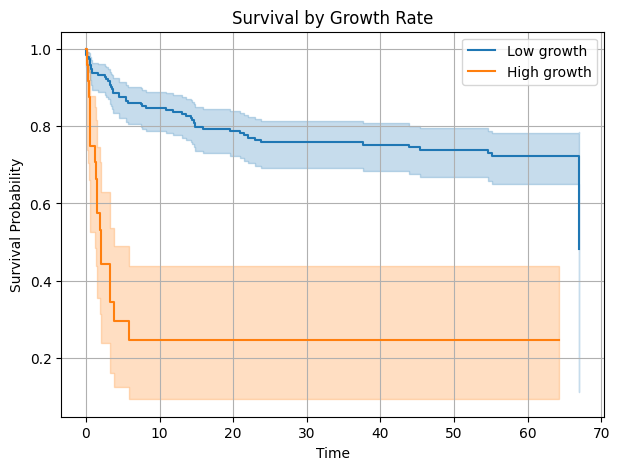

In [340]:
# 📊 2. Check survival curves by risk group (VERY useful)

median_growth = X["area_growth_rate_ha_per_h"].median()

high_risk = X["area_growth_rate_ha_per_h"] > median_growth

kmf = KaplanMeierFitter()

plt.figure(figsize=(7,5))

kmf.fit(y["time"][~high_risk], y["event"][~high_risk], label="Low growth")
kmf.plot_survival_function()

kmf.fit(y["time"][high_risk], y["event"][high_risk], label="High growth")
kmf.plot_survival_function()

plt.title("Survival by Growth Rate")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.show()


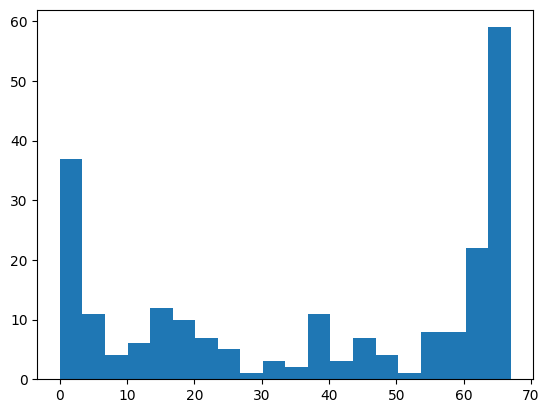

In [341]:
from lifelines import (KaplanMeierFitter,CoxPHFitter)

plt.hist(y["time"],bins=20)
plt.show()

1.9929637366666664


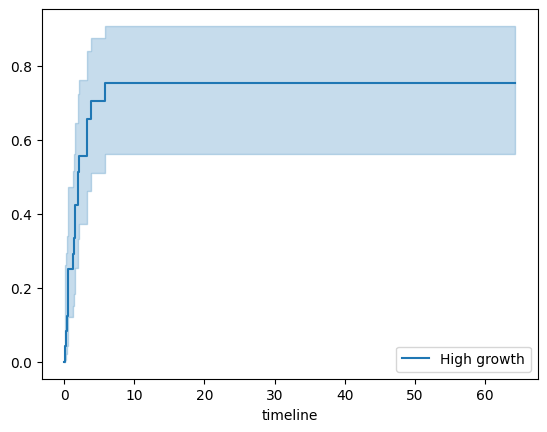

In [342]:
print(kmf.median_survival_time_)

kmf.plot_cumulative_density()
plt.show()

In [343]:
from lifelines.utils import median_survival_times

median_ =  kmf.median_survival_time_

median_confidence_interval  =median_survival_times(kmf.confidence_interval_)
print(median_  , median_confidence_interval)

1.9929637366666664      High growth_lower_0.95  High growth_upper_0.95
0.5                1.262348                3.791231


In [344]:
# from lifelines import CoxPHFitter

# df_surv = X.copy()
# df_surv["time"] = y["time"]
# df_surv["event"] = y["event"]

# cph = CoxPHFitter()
# cph.fit(df_surv, duration_col="time", event_col="event")

# cph.check_assumptions(df_surv)


In [345]:
# 🚀 Bonus: Quick “Kepler/log dynamics” check


# bins = pd.qcut(drop_duplicates(X[["area_growth_rate_ha_per_h"]]), 4)

# plt.figure(figsize=(7,5))

# for b in bins.unique():
#     mask = bins == b
#     kmf.fit(y["time"][mask], y["event"][mask], label=str(b))
#     kmf.plot_survival_function()

# plt.title("Survival by Growth Quartiles")
# plt.show()


In [346]:
# y["event"].value_counts()
# plt.hist(y["time"], bins=30)
# plt.title("Time-to-event distribution")
# plt.show()

In [347]:
# 0=winter, 1=spring, 2=summer, 3=fall
# X["season_la"] = ((X["event_start_month"] % 12) // 3)
# X_test["season_la"] = ((X_test["event_start_month"] % 12) // 3)


# # base season (from earlier)
# season = (X["event_start_month"] % 12) // 3  

# # fire risk intensity
# X["fire_risk_level"] = np.select(
#     [season == 0, season == 1, season == 2, season == 3],
#     [0, 1, 3, 2]
# )

# X_test["fire_risk_level"] = np.select(
#     [((X_test["event_start_month"] % 12) // 3) == i for i in range(4)],
#     [0, 1, 3, 2]
# )


# X["is_working_day"] = (X["event_start_dayofweek"] < 5).astype(int)
# X_test["is_working_day"] = (X_test["event_start_dayofweek"] < 5).astype(int)


# X["day_type"] = np.select(
#     [X["event_start_dayofweek"] < 5,
#      X["event_start_dayofweek"] == 5,
#      X["event_start_dayofweek"] == 6],
#     [2, 1, 1]   # workday high, weekend lower
# )

# import numpy as np

# # ===== Cyclical: day of week =====
# X["dow_sin"] = np.sin(2*np.pi * X["event_start_dayofweek"] / 7)
# X["dow_cos"] = np.cos(2*np.pi * X["event_start_dayofweek"] / 7)

# X_test["dow_sin"] = np.sin(2*np.pi * X_test["event_start_dayofweek"] / 7)
# X_test["dow_cos"] = np.cos(2*np.pi * X_test["event_start_dayofweek"] / 7)


# # ===== Cyclical: month =====
# X["month_sin"] = np.sin(2*np.pi * X["event_start_month"] / 12)
# X["month_cos"] = np.cos(2*np.pi * X["event_start_month"] / 12)

# X_test["month_sin"] = np.sin(2*np.pi * X_test["event_start_month"] / 12)
# X_test["month_cos"] = np.cos(2*np.pi * X_test["event_start_month"] / 12)


# # ===== LA season fire risk (numeric weights) =====
# # Winter=1, Spring=2, Summer=3, Fall=4 (highest risk)

# season_risk_map = {
#     12:1, 1:1, 2:1,      # Winter (low)
#     3:2, 4:2, 5:2,      # Spring
#     6:3, 7:3, 8:3,      # Summer
#     9:4,10:4,11:4      # Fall (Santa Ana winds)
# }

# X["season_risk"] = X["event_start_month"].map(season_risk_map)
# X_test["season_risk"] = X_test["event_start_month"].map(season_risk_map)


    🌲 Tree & Ensemble Methods
    
    Random Survival Forest (RSF)
    
    Extra Survival Trees
    
    Gradient Boosting Survival Analysis
    
    Componentwise Gradient Boosting Survival
    
    📈 Boosting / Additive Models
    
    CoxBoost
    
    AdaBoost for Survival
    
    XGBoost Survival (Cox / AFT)
    
    LightGBM Survival
    
    🌐 Kernel / Nonlinear Methods
    
    Survival SVM (RBF kernel)
    
    Kernel Cox Regression
    
    RBF Feature Expansion + Boosting
    
    🧠 Neural (only for large data)
    
    DeepSurv
    
    Cox-nnet
    
    DeepHit
    
    🔗 Ensemble Strategies (very powerful)
    
    Model Averaging
    
    Stacking (meta-learner)
    
    Blending
    
    🧪 Feature-level Boosting
    
    Interaction features
    
    Polynomial features
    
    SHAP-based feature selection
    
    Recursive Feature Elimination (RFE)

In [348]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

def compute_baseline_hazard(time, event, risk):

    order = np.argsort(time)
    time = time[order]
    event = event[order]
    risk = risk[order]

    unique_times = np.unique(time[event])

    baseline_hazard = []

    # 🔧 clip risk to avoid overflow
    exp_risk = np.exp(np.clip(risk, -50, 50))

    for t in unique_times:
        at_risk = exp_risk[time >= t]
        d = np.sum((time == t) & event)

        hz = d / np.sum(at_risk)
        baseline_hazard.append(hz)

    baseline_hazard = np.array(baseline_hazard)
    baseline_cumhaz = np.cumsum(baseline_hazard)

    return unique_times, baseline_cumhaz


def predict_survival_from_cox(risk_preds, base_times, base_cumhaz):

    surv_fns = []

    # 🔧 clip again for safety
    risk_preds = np.clip(risk_preds, -50, 50)

    for r in risk_preds:

        surv = np.exp(-base_cumhaz * np.exp(r))

        # 🔧 attach domain so get_safe_prob works
        def fn(t, bt=base_times, s=surv):
            return np.interp(t, bt, s, left=1.0, right=s[-1])

        fn.domain = (0, base_times[-1])   # ✅ minimal fix

        surv_fns.append(fn)

    return surv_fns

def extract_event_probs_other(surv_fns, horizons, eps=1e-6):

    probs = np.zeros((len(surv_fns), len(horizons)))

    for i, fn in enumerate(surv_fns):
        for j, t in enumerate(horizons):
            s = fn(t)
            probs[i, j] = np.clip(1 - s, eps, 1 - eps)

    return probs


def calculate_hybrid_score_cox(
    risk_preds,
    surv_fns,
    y_val,
    horizons=[24,48,72],
    weights=[0.3,0.4,0.3],
    eps=1e-6
):

    # =====================
    # 1. C-index
    # =====================

    c_index = concordance_index_censored(
        y_val["event"],
        y_val["time"],
        risk_preds
    )[0]

    # =====================
    # 2. Safe horizons
    # =====================

    min_time = y_val["time"].min()
    max_time = y_val["time"].max()

    safe_horizons = np.clip(
        horizons,
        min_time + eps,
        max_time - eps
    )

    # =====================
    # 3. Event probs
    # =====================

    event_probs = extract_event_probs(surv_fns, safe_horizons)

    event_probs_all = extract_event_probs(
        surv_fns, [12,24,48,72]
    )

    # =====================
    # 4. Brier
    # =====================

    brier_vals = []

    for i, t in enumerate(safe_horizons):

        surv_probs = 1 - event_probs[:, i]

        _, bs = brier_score(
            y_val,
            y_val,
            surv_probs,
            t
        )

        brier_vals.append(bs[0])

    brier_vals = np.array(brier_vals)

    weighted_brier = np.average(
        brier_vals,
        weights=weights[:len(brier_vals)]
    )

    # =====================
    # 5. Hybrid
    # =====================

    hybrid = 0.3 * c_index + 0.7 * (1 - weighted_brier)

    return {
        "hybrid": hybrid,
        "c_index": c_index,
        "weighted_brier": weighted_brier,
        "brier_each": dict(zip(horizons, brier_vals)),

        "prob_12h": event_probs_all[:,0],
        "prob_24h": event_probs_all[:,1],
        "prob_48h": event_probs_all[:,2],
        "prob_72h": event_probs_all[:,3],

        "risk_score": risk_preds
    }

In [349]:
from sksurv.linear_model import CoxnetSurvivalAnalysis

# meta-learner 

# ---- meta learner (LASSO Cox) ----
meta_model = CoxnetSurvivalAnalysis(
    l1_ratio=0.7,   # 1 = pure LASSO, 0 = Ridge, between = ElasticNet
    alpha_min_ratio=0.01,
    n_alphas=100
)

#top predicted classifier 

gbsa = GradientBoostingSurvivalAnalysis(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3
)

#models inside meta 

rsf = RandomSurvivalForest(
    n_estimators=300,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42
)


cgbsa = ComponentwiseGradientBoostingSurvivalAnalysis(
    n_estimators=600,        # boosting rounds
    learning_rate=0.02,     # small = better generalization
    subsample=0.75,          # stochastic boosting
    dropout_rate=0.15,       # regularization (like dropout)
    random_state=42
)


est = ExtraSurvivalTrees(
    n_estimators=400,               
    min_samples_split=10,
    min_samples_leaf=5,
    max_features="sqrt",
    bootstrap=False,        # ExtraTrees usually works better without bootstrap
    n_jobs=-1,
    random_state=42
)

In [356]:
from sksurv.linear_model import CoxnetSurvivalAnalysis



# ===============================
# Stratified CV
# ===============================

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

hybrid_scores = []
cindex_scores = []
brier_scores = []


# ===============================
# OOF containers
# ===============================

oof_event_prob_12h = np.zeros(len(X))
oof_event_prob_24h = np.zeros(len(X))
oof_event_prob_48h = np.zeros(len(X))
oof_event_prob_72h = np.zeros(len(X))

oof_risk = np.zeros(len(X))   # optional


# ===============================
# TEST containers (accumulate)
# ===============================

test_event_prob_12h_sum = np.zeros(len(X_test))
test_event_prob_24h_sum = np.zeros(len(X_test))
test_event_prob_48h_sum = np.zeros(len(X_test))
test_event_prob_72h_sum = np.zeros(len(X_test))

test_risk_sum = np.zeros(len(X_test))


# ===============================
# CV loop
# ===============================

for fold, (train_idx, val_idx) in enumerate(skf.split(X, event), 1):

    print(f"\n===== Fold {fold} =====")

    X_train_df, X_val_df = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    X_train_df = growth_intensity(X_train_df)
    X_val_df = growth_intensity(X_val_df)
    X_test = growth_intensity(X_test)


    # X_train_df=engineer_features(X_train_df)
    # X_val_df = engineer_features(X_val_df)
    # X_test = engineer_features(X_test)

    # -------------------------
    # Scale
    # -------------------------

    scaler = StandardScaler()

    X_train = scaler.fit_transform(X_train_df)
    X_val   = scaler.transform(X_val_df)
    X_test_scaled = scaler.transform(X_test)

    # -------------------------
    # gbsa
    # -------------------------

    gbsa.fit(X_train, y_train)


    # -------------------------
    # RSF
    # -------------------------

    rsf.fit(X_train, y_train)

    # -------------------------
    # cgbsa
    # -------------------------

    cgbsa.fit(X_train, y_train)

    # -------------------------
    # est
    # -------------------------

    est.fit(X_train, y_train)

    # -------------------------
    # Stacking
    # -------------------------

    meta_val = np.column_stack([
        # gbsa.predict(X_val),
        rsf.predict(X_val),
        cgbsa.predict(X_val),
        est.predict(X_val)
        
    ])

    scaler.fit(meta_val)
    meta_val_scaled = scaler.transform(meta_val)

    
    meta_model.fit(meta_val_scaled, y_val)


    stacking_model = {
        "base_models": [
            rsf, 
            cgbsa,
            est,
            # gbsa
        ],   # RSF, GBSA, ExtraTrees
        "meta_model": meta_model,
        "scaler": scaler
    }

    #..........................

    meta_test = np.column_stack([
        # gbsa.predict(X_test),
        rsf.predict(X_test),
        cgbsa.predict(X_test),
        est.predict(X_test)
    ])

    meta_test_scaled = scaler.transform(meta_test)
    
    final_risk = meta_model.predict(meta_test_scaled)


    #...........................

    
    risk_rsf = rsf.predict(X_val)
    risk_cgbsa = cgbsa.predict(X_val)
    risk_est = est.predict(X_val)

    rk_preds=[risk_rsf, risk_cgbsa ,risk_est]

    # -------------------------
    # Hybrid + event probs (VAL)
    # -------------------------

    metrics_gbsa = calculate_hybrid_score(
        model= gbsa,
        X_val=X_val,
        y_val=y_val,
        horizons=[24, 48, 72],
        weights=[0.3, 0.4, 0.3]
    )

    metrics_blending = calculate_hybrid_score(
        # model= stacking_model,
        model= [rsf, cgbsa, est],
        X_val=X_val,
        y_val=y_val,
        horizons=[24, 48, 72],
        weights=[0.3, 0.4, 0.3]
    )

    metrics_list = [
        metrics_gbsa,
        metrics_blending
    ]

    n_models = len(metrics_list)

    # ===============================
    # AVERAGE OOF EVENT PROBS
    # ===============================

    # avg_12h = np.mean([m["prob_12h"] for m in metrics_list], axis=0)
    # avg_24h = np.mean([m["prob_24h"] for m in metrics_list], axis=0)
    # avg_48h = np.mean([m["prob_48h"] for m in metrics_list], axis=0)
    # avg_72h = np.mean([m["prob_72h"] for m in metrics_list], axis=0)

    # avg_risk = np.mean([m["risk_score"] for m in metrics_list], axis=0)

    w = np.array([0.95, 0.05])   # gbsa, stacking
    
    avg_12h = np.sum([w[i] * metrics_list[i]["prob_12h"] for i in range(len(metrics_list))], axis=0)
    avg_24h = np.sum([w[i] * metrics_list[i]["prob_24h"] for i in range(len(metrics_list))], axis=0)
    avg_48h = np.sum([w[i] * metrics_list[i]["prob_48h"] for i in range(len(metrics_list))], axis=0)
    avg_72h = np.sum([w[i] * metrics_list[i]["prob_72h"] for i in range(len(metrics_list))], axis=0)
    
    avg_risk = np.sum(
        [weights[i] * metrics_list[i]["risk_score"] for i in range(len(metrics_list))],
        axis=0
    )


    # -------------------------
    # SAVE OOF EVENT PROBS
    # -------------------------


    
    oof_event_prob_12h[val_idx] = avg_12h
    oof_event_prob_24h[val_idx] = avg_24h
    oof_event_prob_48h[val_idx] = avg_48h
    oof_event_prob_72h[val_idx] = avg_72h

    oof_risk[val_idx] = avg_risk

    # ===============================
    # TEST survival predictions
    # ===============================

    test_surv_fns_gbsa = gbsa.predict_survival_function(X_test_scaled)

    test_surv_fns_blend= get_survival_functions(
        # stacking_model,
        [rsf, cgbsa, est],
        X_test_scaled, risk_preds=rk_preds, blend_weights=[0.7,0.1,0.2])


    test_probs_gbsa = extract_event_probs(test_surv_fns_gbsa, [12,24,48,72])

    test_probs_blend = extract_event_probs(test_surv_fns_blend, [12,24,48,72])

    # -------------------------
    # Average across models
    # -------------------------

    # test_probs_mean = (
    #     test_probs_gbsa 
    #     # + 
    #     # test_probs_blend
    # ) / n_models



    test_probs_weighted = (
        w[0] * test_probs_gbsa
        +
        w[1] * test_probs_blend
    )


    # -------------------------
    # Accumulate across folds
    # -------------------------

    test_event_prob_12h_sum += test_probs_mean[:,0]
    test_event_prob_24h_sum += test_probs_mean[:,1]
    test_event_prob_48h_sum += test_probs_mean[:,2]
    test_event_prob_72h_sum += test_probs_mean[:,3]

    test_risk_sum += np.mean([
        gbsa.predict(X_test_scaled),
        get_risk_predictions(
            [rsf, cgbsa, est],
            # stacking_model,
            X_test_scaled, blend_weights=[0.7,0.1,0.2]
        )
    ], axis=0)

    
    
    # test_risk_sum += (
    #     w[0] * gbsa.predict(X_test_scaled)
    #     +
    #     w[1] * get_risk_predictions(stacking_model, X_test_scaled)
    # )


    # -------------------------
    # Logs (per fold average)
    # -------------------------

    print("Hybrid avg:", np.mean([m["hybrid"] for m in metrics_list]))
    print("C-index avg:", np.mean([m["c_index"] for m in metrics_list]))
    print("WBrier avg:", np.mean([m["weighted_brier"] for m in metrics_list]))

    hybrid_scores.append(np.mean([m["hybrid"] for m in metrics_list]))
    cindex_scores.append(np.mean([m["c_index"] for m in metrics_list]))
    brier_scores.append(np.mean([m["weighted_brier"] for m in metrics_list]))



# ===============================
# Average TEST predictions
# ===============================

n_folds = skf.n_splits

test_event_prob_12h = test_event_prob_12h_sum / n_folds
test_event_prob_24h = test_event_prob_24h_sum / n_folds
test_event_prob_48h = test_event_prob_48h_sum / n_folds
test_event_prob_72h = test_event_prob_72h_sum / n_folds

test_risk = test_risk_sum / n_folds


# ===============================
# Attach to test dataframe
# ===============================

sub["prob_12h"] = test_event_prob_12h
sub["prob_24h"] = test_event_prob_24h
sub["prob_48h"] = test_event_prob_48h
sub["prob_72h"] = test_event_prob_72h
# test["risk_score"]    = test_risk

# ===============================
# Final CV results
# ===============================

print("\n==============================")
print("MEAN Hybrid :", np.mean(hybrid_scores))
print("MEAN C-index:", np.mean(cindex_scores))
print("MEAN WBrier :", np.mean(brier_scores))
print("STD Hybrid  :", np.std(hybrid_scores))


#strong are gbsa
# weak on est , ComponentwiseGradientBoostingSurvivalAnalysis ,rbf


===== Fold 1 =====


C:\Users\maury\AppData\Local\Temp\ipykernel_23236\2338173068.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["growth_pressure"] = df["area_growth_rate_ha_per_h"] * df["radial_growth_rate_m_per_h"]
C:\Users\maury\AppData\Local\Temp\ipykernel_23236\2338173068.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_growth_rate"] = np.log1p(df["area_growth_rate_ha_per_h"])
C:\Users\maury\AppData\Local\Temp\ipykernel_23236\2338173068.py:11: SettingWithCopyWarning: 
A value is trying to be set on a co

Hybrid avg: 0.9732902614742468
C-index avg: 0.9500978473581213
WBrier avg: 0.016770132475985012

===== Fold 2 =====


C:\Users\maury\AppData\Local\Temp\ipykernel_23236\2338173068.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["growth_pressure"] = df["area_growth_rate_ha_per_h"] * df["radial_growth_rate_m_per_h"]
C:\Users\maury\AppData\Local\Temp\ipykernel_23236\2338173068.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_growth_rate"] = np.log1p(df["area_growth_rate_ha_per_h"])
C:\Users\maury\AppData\Local\Temp\ipykernel_23236\2338173068.py:11: SettingWithCopyWarning: 
A value is trying to be set on a co

Hybrid avg: 0.9478791207691404
C-index avg: 0.9260089686098655
WBrier avg: 0.04274795687688469

===== Fold 3 =====


C:\Users\maury\AppData\Local\Temp\ipykernel_23236\2338173068.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["growth_pressure"] = df["area_growth_rate_ha_per_h"] * df["radial_growth_rate_m_per_h"]
C:\Users\maury\AppData\Local\Temp\ipykernel_23236\2338173068.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_growth_rate"] = np.log1p(df["area_growth_rate_ha_per_h"])
C:\Users\maury\AppData\Local\Temp\ipykernel_23236\2338173068.py:11: SettingWithCopyWarning: 
A value is trying to be set on a co

Hybrid avg: 0.9405991867889618
C-index avg: 0.9252136752136753
WBrier avg: 0.052807022535915335

===== Fold 4 =====


C:\Users\maury\AppData\Local\Temp\ipykernel_23236\2338173068.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["growth_pressure"] = df["area_growth_rate_ha_per_h"] * df["radial_growth_rate_m_per_h"]
C:\Users\maury\AppData\Local\Temp\ipykernel_23236\2338173068.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_growth_rate"] = np.log1p(df["area_growth_rate_ha_per_h"])
C:\Users\maury\AppData\Local\Temp\ipykernel_23236\2338173068.py:11: SettingWithCopyWarning: 
A value is trying to be set on a co

Hybrid avg: 0.9764330898381794
C-index avg: 0.9695740365111563
WBrier avg: 0.02062731587881066

===== Fold 5 =====


C:\Users\maury\AppData\Local\Temp\ipykernel_23236\2338173068.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["growth_pressure"] = df["area_growth_rate_ha_per_h"] * df["radial_growth_rate_m_per_h"]
C:\Users\maury\AppData\Local\Temp\ipykernel_23236\2338173068.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_growth_rate"] = np.log1p(df["area_growth_rate_ha_per_h"])
C:\Users\maury\AppData\Local\Temp\ipykernel_23236\2338173068.py:11: SettingWithCopyWarning: 
A value is trying to be set on a co

Hybrid avg: 0.9494677081059234
C-index avg: 0.9171907756813418
WBrier avg: 0.036699320854970144

MEAN Hybrid : 0.9575338733952904
MEAN C-index: 0.9376170606748321
MEAN WBrier : 0.03393034972451316
STD Hybrid  : 0.014494861356025117


In [286]:
# MEAN Hybrid : 0.9704636399722976
# MEAN C-index: 0.9399400388519539
# MEAN WBrier : 0.01645481669041229
# STD Hybrid  : 0.012584137146992644

In [222]:
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor


time = train["time_to_hit_hours"].values
event = train["event"].astype(bool).values

y = Surv.from_arrays(event, time)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ===============================
# OOF containers
# ===============================

oof_event_prob_12h = np.zeros(len(X))
oof_event_prob_24h = np.zeros(len(X))
oof_event_prob_48h = np.zeros(len(X))
oof_event_prob_72h = np.zeros(len(X))
oof_risk = np.zeros(len(X))

# ===============================
# TEST accumulators
# ===============================

test_event_prob_12h_sum = np.zeros(len(X_test))
test_event_prob_24h_sum = np.zeros(len(X_test))
test_event_prob_48h_sum = np.zeros(len(X_test))
test_event_prob_72h_sum = np.zeros(len(X_test))
test_risk_sum = np.zeros(len(X_test))

hybrid_scores = []
cindex_scores = []
brier_scores = []



# cat_params = {
#     "loss_function": "Quantile",
#     "eval_metric": "Quantile",
#     "custom_metric": ["AUC", "RMSE"],
#     "bootstrap_type": "Bernoulli",
#     "grow_policy": "Depthwise",
#     "min_data_in_leaf": 14,
#     "random_strength": 0.25,
#     "iterations": 2500,
#     "learning_rate": 0.05,
#     "l2_leaf_reg": 7,
#     "depth": 6,
#     "verbose": 250
# }

# ===============================
# CV LOOP
# ===============================

for fold, (train_idx, val_idx) in enumerate(skf.split(X, event),1):

    print(f"\n===== Fold {fold} =====")

    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y[train_idx], y[val_idx]

    X_tr = growth_intensity(X_tr)
    y_val = growth_intensity(y_val)
    X_test_fe  = growth_intensity(X_test.copy())  # avoid modifying original X_test

    # ===============================
    # SCALING
    # ===============================

    scaler = StandardScaler()
    X_tr = scaler.fit_transform(X_tr)
    X_val = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test_fe )


    # ===============================
    # LIGHTGBM COX
    # ===============================

    # lgbm = lgb.LGBMRegressor(
    #     objective="cox",          # 👈 Cox proportional hazards
    #     n_estimators=500,
    #     learning_rate=0.05,
    #     num_leaves=31,
    #     max_depth=-1,
    #     subsample=0.8,
    #     colsample_bytree=0.8,
    #     verbose=-1
    # )

    # lgbm.fit(
    #     X_tr,
    #     y_tr["time"],
    #     sample_weight=y_tr["event"].astype(int)
    # )

    # ===============================
    # XGBOOST COX
    # ===============================

    xgbm = xgb.XGBRegressor(
        objective="survival:cox",
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=7,
        verbosity=1   # ✅ must be 0–3
    )


    xgbm.fit(
        X_tr,
        y_tr["time"],
        sample_weight=y_tr["event"].astype(int)
    )

    # ===============================
    # CATBOOST COX
    # ===============================

    
    
    # cat = CatBoostRegressor(iterations=500,
    #                        loss_function='SurvivalAft:dist=Logistic;scale=1.2',
    #                        eval_metric='SurvivalAft',
    #                        verbose=100)

    cat = CatBoostRegressor(
        iterations=500,
        loss_function='Cox',
        eval_metric='Cox',
        verbose=100
    )

    # cat= CatBoostRegressor(**cat_params)
    

    cat.fit(
        X_tr,
        y_tr["time"],
        sample_weight=y_tr["event"].astype(int)
    )

    models = [
        # lgbm,
        # xgbm,
        cat
    ]

    metrics_list = []

    for model in models:

        risk_val = model.predict(X_val)

        base_t, base_ch = compute_baseline_hazard(
            y_tr["time"],
            y_tr["event"],
            model.predict(X_tr)
        )

        surv_val = predict_survival_from_cox(
            risk_val,
            base_t,
            base_ch
        )

        metrics = calculate_hybrid_score_cox(
            risk_preds=risk_val,
            surv_fns=surv_val,
            y_val=y_val
        )

        metrics_list.append(metrics)

    # ===============================
    # AVERAGE OOF
    # ===============================

    oof_event_prob_12h[val_idx] = np.mean([m["prob_12h"] for m in metrics_list], axis=0)
    oof_event_prob_24h[val_idx] = np.mean([m["prob_24h"] for m in metrics_list], axis=0)
    oof_event_prob_48h[val_idx] = np.mean([m["prob_48h"] for m in metrics_list], axis=0)
    oof_event_prob_72h[val_idx] = np.mean([m["prob_72h"] for m in metrics_list], axis=0)

    oof_risk[val_idx] = np.mean([m["risk_score"] for m in metrics_list], axis=0)

    # ===============================
    # TEST preds
    # ===============================

    for model in models:

        risk_test = model.predict(X_test_scaled)

        risk_tr = model.predict(X_tr).astype(np.float64)
        risk_tr -= np.mean(risk_tr)
        risk_tr = np.clip(risk_tr, -50, 50)

        base_t, base_ch = compute_baseline_hazard(
            y_tr["time"],
            y_tr["event"],
            risk_tr
        )

        surv_test = predict_survival_from_cox(
            risk_test,
            base_t,
            base_ch
        )

        probs_test = extract_event_probs(
            surv_test, [12,24,48,72]
        )

        test_event_prob_12h_sum += probs_test[:,0] / len(models)
        test_event_prob_24h_sum += probs_test[:,1] / len(models)
        test_event_prob_48h_sum += probs_test[:,2] / len(models)
        test_event_prob_72h_sum += probs_test[:,3] / len(models)

        test_risk_sum += risk_test / len(models)

    # ===============================
    # LOGS
    # ===============================

    hybrid_scores.append(np.mean([m["hybrid"] for m in metrics_list]))
    cindex_scores.append(np.mean([m["c_index"] for m in metrics_list]))
    brier_scores.append(np.mean([m["weighted_brier"] for m in metrics_list]))

    print("Hybrid:", hybrid_scores[-1])
    print("C-index:", cindex_scores[-1])
    print("WBrier:", brier_scores[-1])


# ===============================
# Average TEST predictions
# ===============================

n_folds = skf.n_splits

test_event_prob_12h = test_event_prob_12h_sum / n_folds
test_event_prob_24h = test_event_prob_24h_sum / n_folds
test_event_prob_48h = test_event_prob_48h_sum / n_folds
test_event_prob_72h = test_event_prob_72h_sum / n_folds

test_risk = test_risk_sum / n_folds


# ===============================
# Attach to test dataframe
# ===============================

sub["prob_12h"] = test_event_prob_12h
sub["prob_24h"] = test_event_prob_24h
sub["prob_48h"] = test_event_prob_48h
sub["prob_72h"] = test_event_prob_72h
# test["risk_score"]    = test_risk

# ===============================
# Final CV results
# ===============================

print("\n==============================")
print("MEAN Hybrid :", np.mean(hybrid_scores))
print("MEAN C-index:", np.mean(cindex_scores))
print("MEAN WBrier :", np.mean(brier_scores))
print("STD Hybrid  :", np.std(hybrid_scores))



===== Fold 1 =====


C:\Users\maury\AppData\Local\Temp\ipykernel_23236\2338173068.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["growth_pressure"] = df["area_growth_rate_ha_per_h"] * df["radial_growth_rate_m_per_h"]
C:\Users\maury\AppData\Local\Temp\ipykernel_23236\2338173068.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_growth_rate"] = np.log1p(df["area_growth_rate_ha_per_h"])
C:\Users\maury\AppData\Local\Temp\ipykernel_23236\2338173068.py:11: SettingWithCopyWarning: 
A value is trying to be set on a co

ValueError: no field of name area_growth_rate_ha_per_h

In [288]:
# df=pd.DataFrame()
train_with_oof = attach_survival_predictions(
    base_df=train,
    oof_prob_12h=oof_event_prob_12h,
    oof_prob_24h=oof_event_prob_24h,
    oof_prob_48h=oof_event_prob_48h,
    oof_prob_72h=oof_event_prob_72h,
    risk_scores=oof_risk
)

train_with_oof
# attach_survival_predictions(base_df, event_probs, risk_scores, index)

,event_id,num_perimeters_0_5h,dt_first_last_0_5h,low_temporal_resolution_0_5h,area_first_ha,area_growth_abs_0_5h,area_growth_rel_0_5h,area_growth_rate_ha_per_h,log1p_area_first,log1p_growth,...,event_start_hour,event_start_dayofweek,event_start_month,time_to_hit_hours,event,prob_12h,prob_24h,prob_48h,prob_72h,risk_score
0,10892457,3,4.265188,0,79.696304,2.875935,0.036086,0.674281,4.390693,1.354787,...,19,4,5,18.892512,0,0.029979,0.085411,0.113847,0.134590,-1.592069
1,11757157,2,1.169918,0,8.946749,0.000000,0.000000,0.000000,2.297246,0.000000,...,4,4,6,22.048108,1,0.998656,1.000000,1.000000,1.000000,4.028727
2,11945086,4,4.777526,0,106.482638,0.000000,0.000000,0.000000,4.677329,0.000000,...,22,4,8,0.888895,1,1.000000,1.000000,1.000000,1.000000,4.635836
3,12044083,1,0.000000,1,67.631125,0.000000,0.000000,0.000000,4.228746,0.000000,...,20,5,8,60.953021,0,0.009572,0.030844,0.040538,0.136758,-1.721490
4,12052347,2,4.975273,0,35.632874,0.000000,0.000000,0.000000,3.600946,0.000000,...,21,5,7,44.990274,0,0.009711,0.029321,0.043323,0.140000,-1.281916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,97075632,1,0.000000,1,51.295195,0.000000,0.000000,0.000000,3.956904,0.000000,...,17,6,6,66.340624,0,0.008636,0.027514,0.040117,0.125654,-2.189091
217,97362560,2,1.127102,0,1.176991,0.000000,0.000000,0.000000,0.777943,0.000000,...,18,1,7,5.694898,1,0.279528,0.690898,0.793214,0.993575,1.868090
218,97805715,2,3.710653,0,71.946930,0.000000,0.000000,0.000000,4.289732,0.000000,...,18,1,9,44.011253,0,0.011292,0.034038,0.050235,0.160975,-0.927689
219,99071478,1,0.000000,1,20.223659,0.000000,0.000000,0.000000,3.055117,0.000000,...,15,0,8,22.975783,1,0.447456,0.880499,0.942260,0.999892,2.356246


In [289]:
train_with_oof.set_index("event_id",inplace=True)
train_with_oof.iloc[:,-7:]

,time_to_hit_hours,event,prob_12h,prob_24h,prob_48h,prob_72h,risk_score
event_id,,,,,,,
10892457,18.892512,0,0.029979,0.085411,0.113847,0.134590,-1.592069
11757157,22.048108,1,0.998656,1.000000,1.000000,1.000000,4.028727
11945086,0.888895,1,1.000000,1.000000,1.000000,1.000000,4.635836
12044083,60.953021,0,0.009572,0.030844,0.040538,0.136758,-1.721490
12052347,44.990274,0,0.009711,0.029321,0.043323,0.140000,-1.281916
...,...,...,...,...,...,...,...
97075632,66.340624,0,0.008636,0.027514,0.040117,0.125654,-2.189091
97362560,5.694898,1,0.279528,0.690898,0.793214,0.993575,1.868090
97805715,44.011253,0,0.011292,0.034038,0.050235,0.160975,-0.927689


In [290]:
# import pandas as pd

# # Initialize a list to store the probabilities
# submission_data = []

# for fn in surv_funcs:
#     # fn(t) gives the probability of survival at time t
#     # 1 - fn(t) gives the probability of the event having occurred
#     probs = [1 - fn(t) for t in time_points]
#     submission_data.append(probs)

# # Create the DataFrame
# submission_df = pd.DataFrame(submission_data, columns=['prob_12h', 'prob_24h', 'prob_48h', 'prob_72h'])

# # Add the event_id from your original test set
# submission_df['event_id'] = test['event_id'].values

# # Reorder columns to match the required schema
# submission_df = sub[['event_id', 'prob_12h', 'prob_24h', 'prob_48h', 'prob_72h']]


from datetime import datetime

time = datetime.now().strftime("%Y%m%d_%H%M%S")

sub.to_csv("submission_surv_{}.csv".format(time), index=False)